In [1]:

# coding: utf-8

# In[346]:


from array import array
import sys
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

import math
import csv
import pandas

In [2]:
def Square_difference_Cost_Function(Y_predict,Y_true):

    CostFunction = np.sum((Y_predict-Y_true)**2)
    return CostFunction

In [3]:

class Lagrangians(object):
    
    def __init__(self):
        m = 1

    def SHO_Lagrangian(self,Phase_Space_time_samples):
        m = 1
        k = 1
        Number_Of_Samples = len(Phase_Space_time_samples[1,:])
        x = Phase_Space_time_samples[1,:]
        v = Phase_Space_time_samples[2,:]   

        Lagrangian_Samples = 0.5*m*(v**2) - 0.5*k*(x**2)
        
        return         Lagrangian_Samples 
    
    
    def Lagrangian_Mass(self):
        m = 1
        return m
    
def Calculate_Lagrangian_for_1D_SHO_(Phase_Space_time_samples):
    Lagrangian_for_1D_SHO_ = Lagrangian_for_1D_SHO(Phase_Space_time_samples)
    return Lagrangian_for_1D_SHO_



Phase_Space_time_samples = np.random.rand(3,5)
L = Lagrangians()
print(L.SHO_Lagrangian(Phase_Space_time_samples))

print(L.Lagrangian_Mass())

[ 0.38910517  0.04099834  0.33406216  0.02348841 -0.15407302]
1


In [4]:
def Create_true_Lagrangian_path(First_Three_Space_Time_samples,T_total):

    ## First_Three_Space_Time_samples [x1,x2,x3],[t1,t2,t3]
    dq = (First_Three_Space_Time_samples[0,2] - First_Three_Space_Time_samples[0,0])/2
    dt = (First_Three_Space_Time_samples[1,2] - First_Three_Space_Time_samples[1,0])/2
    dv = First_Three_Space_Time_samples[0,2] + First_Three_Space_Time_samples[0,0] -2*First_Three_Space_Time_samples[0,1] 
    

    q_0 = First_Three_Space_Time_samples[0,1]
    v_0 = dq/dt
    Initial_conditions = np.array([q_0,v_0])



    # NumberOfSamples = 10000
    NumberOfSamples = int(T_total/dt)
    dq_true = np.zeros(NumberOfSamples)
    dv_true = np.zeros(NumberOfSamples)
    q_true = np.zeros(NumberOfSamples)
    v_true = np.zeros(NumberOfSamples)

    ## Initializing
    q_true[0] = Initial_conditions[0]
    v_true[0] = Initial_conditions[1]
    
    L = Lagrangians()
#     dq_true[0], dp_true[0] = Create_True_Hamiltonian_paths(H,Initial_conditions,dt,dq,dp,T_total)


    dq_true[0], dv_true[0] = Create_True_Lagrangian_Changes(L,Initial_conditions,dt,dq,T_total)

    for i in range(1,NumberOfSamples):

        q_true[i] = q_true[i-1] + dq_true[i-1]
        v_true[i] = v_true[i-1] + dv_true[i-1]
#         dq_true[i], dp_true[i] = Create_True_Hamiltonian_paths(H,np.array([q_true[i],p_true[i]]),dt,dq_true[i-1],dp_true[i-1],T_total)
        dq_true[i], dv_true[i] = Create_True_Lagrangian_Changes(L,np.array([q_true[i],v_true[i]]),dt,dq_true[i-1],T_total)

    return q_true, v_true, dq_true, dv_true




def Create_True_Lagrangian_Changes(L,Curent_state,dt,dq,T_total):

    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))

    Sample1 = np.array([t[i],Curent_state[0] - dq/2,Curent_state[1]])               
    Sample2 = np.array([t[i],Curent_state[0] + dq/2,Curent_state[1]])


    

    Phase_Space_time_samples = np.array([Sample1, Sample2]).transpose()
#     print(    Phase_Space_time_samples) 
    
    Lagrangian_Samples = L.SHO_Lagrangian(Phase_Space_time_samples)

    F = (Lagrangian_Samples[1] - Lagrangian_Samples[0])/dq

    v_0 = Curent_state[1]
    m = L.Lagrangian_Mass()
    
    dq_true  = v_0*dt + (F/m)*(dt**2)
    dv_true  = (F/m)*dt
    

    return dq_true, dv_true    

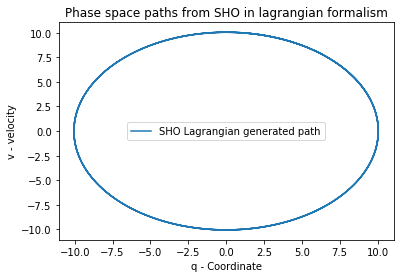

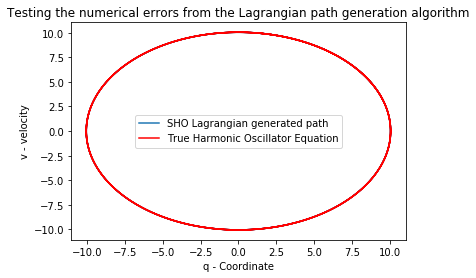

In [5]:

T_total = 20
First_Three_Space_Time_samples = np.array([[1,1.01,1.02],[0,0.001,0.002]])
    
q_true, v_true, dq_true, dp_true = Create_true_Lagrangian_path(First_Three_Space_Time_samples,T_total)

plt.figure(1)
plt.plot(q_true,v_true)
plt.title("Phase space paths from SHO in lagrangian formalism")
plt.xlabel("q - Coordinate")
plt.ylabel("v - velocity")
plt.legend(["SHO Lagrangian generated path","NN Generated Path"])



dq = (First_Three_Space_Time_samples[0,2] - First_Three_Space_Time_samples[0,0])/2
dt = (First_Three_Space_Time_samples[1,2] - First_Three_Space_Time_samples[1,0])/2

q_0 = First_Three_Space_Time_samples[0,1]
v_0 = dq/dt
Initial_conditions = np.array([q_0,v_0])

Number_Of_Samples = int(T_total / dt)
t = np.linspace(0,T_total,Number_Of_Samples)

w = 1

A = q_0
B = v_0/w


q = A*np.cos(w*t) + B*np.sin(w*t)
v = -A*np.sin(w*t) + w*B*np.cos(w*t)
plt.figure(2)
plt.plot(q_true,v_true)
plt.plot(q,v,'r')
plt.title("Testing the numerical errors from the Lagrangian path generation algorithm")
plt.xlabel("q - Coordinate")
plt.ylabel("v - velocity")
plt.legend(["SHO Lagrangian generated path","True Harmonic Oscillator Equation"])

In [6]:
## Two mode optimizer
#function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)
import numpy as np
import matplotlib.pyplot as plt

def Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search):

# function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)


    Vectorized_Implimentation = 0
    For_Loop_Implimentation = 1
    TargetedSearch = np.zeros((len(InitialParameters),NumberOfSamples))
    if sum(abs(Parameter_ChangeVector)) > SignificantChangeValue:
        ImprovementItteration = 1


    
    if Vectorized_Implimentation == 1:
        TargetedSearch = exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)*diag(TargetedMultiplicationFactor*(-Cost_Change)*Parameter_ChangeVector)*ones(length(InitialParameters),NumberOfSamples)*diag(rand(NumberOfSamples,1))
        RandomSearch = exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor*(rand(length(InitialParameters),NumberOfSamples)-0.5)


    if For_Loop_Implimentation == 1:
        RandomNumbers = np.random.rand(NumberOfSamples,1)
        

        TargetedSearch_Amplitude = RandomNumbers*np.exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)         *TargetedMultiplicationFactor*(-Cost_Change)

        for sample in range (1,NumberOfSamples):

            TargetedSearch[:,sample] = TargetedSearch_Amplitude[sample]*Parameter_ChangeVector[:,0]

            
            
        if np.max(np.max(TargetedSearch)) > 10: ## This is if the change vector is too bid
            print("Applied supression of change vector")
            TargetedSearch_Amplitude = RandomNumbers*np.exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)         *TargetedMultiplicationFactor*(-1)

            for sample in range (1,NumberOfSamples):

                TargetedSearch[:,sample] = TargetedSearch_Amplitude[sample]*Parameter_ChangeVector[:,0]

        RandomSearch = min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search)         *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)
        
    
        if min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search) == Maximal_Random_Search:
            RandomSearch = np.sin((ImprovementItteration-1)*2*RandomSearchGrowthRate + np.pi/2)*0.1             *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)

    Suggested_Parameter_Samples_From_Two_Mode = InitialParameters + TargetedSearch + RandomSearch
    Suggested_Parameter_Samples_From_Two_Mode[:,1] = InitialParameters[:,0]

    ImprovementItteration = ImprovementItteration +1;


    return Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration




def Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations):
    
    Parameter_ChangeVector = np.zeros((len(InitialParameters),1))
    Cost_Change = 0
    
    PreviousCost = Cost1.Cost_Function(InitialParameters)
    Best_Individual = InitialParameters

    for i in range(0,Number_Of_Itterations):
        

        Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration = Two_Mode_Optimizer(Best_Individual,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search)

        Cost    = Cost1.Cost_Function(Suggested_Parameter_Samples_From_Two_Mode)
        index_min = np.argmin(Cost)
        CurrentCost = Cost[index_min ]

        Cost_Change = CurrentCost - PreviousCost
        Parameter_ChangeVector = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T - Best_Individual
        Best_Individual = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T

        PreviousCost = CurrentCost
        if print_Cost == 1:
            print("CurrentCost is:",CurrentCost)
            print("")
            print("Now Running Itteration",i,"\\",Number_Of_Itterations)
            print("the ImprovementItteration is:",ImprovementItteration)
    return Best_Individual

print(1)

1


In [7]:

def Save_to_CSV(Net1_Parameters,Net2_Parameters):
    
        ## Save the parameters of the network
#         Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"

        Name_Of_Parameter_File = "Lagrangian_Networks_Parameters.csv"

        with open(Name_Of_Parameter_File, 'w') as csvfile:
            fieldnames = ['Net1_Parameters','Net2_Parameters']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()

            for i in range(0,Net1_Parameters.shape[0]):
                writer.writerow({ 'Net1_Parameters':Net1_Parameters[i],   'Net2_Parameters':Net2_Parameters[i]})




def Load_Parameters_For_Lagrangian():
#     Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"
    Name_Of_Parameter_File = "Lagrangian_Networks_Parameters.csv"
 
    ## Open Parameter array
    Parameters_Path = r"C:\Users\benjy\OneDrive\Brown\Fall 2018\PHYS 2030 - Classical Physics\Project\Files for the project" 
    Parameters_Path1 = Parameters_Path + "\\" + Name_Of_Parameter_File
    Parameters_temp = pandas.read_csv(Parameters_Path1)
    Parameters_Array = np.array(Parameters_temp)

    
    return Parameters_Array



def Open_Parameters_Of_Network_For_Lagrangian():
    Best_Individual1 = Load_Parameters_For_Lagrangian()
    A = Best_Individual1[:,0]
    B = Best_Individual1[:,1]
    print(A.shape)
    print(B.shape)

    Temp = np.concatenate([Best_Individual1[:,0],Best_Individual1[:,1]],axis = 0)
    print(np.array([Temp]).T.shape)

    Best_Individual1 = np.array([Temp]).T


    print(Best_Individual1.shape)
    Parameter_Vector1 = np.zeros(Best_Individual1.shape)

    for i in range(Best_Individual1.shape[0]):
        a = Best_Individual1[i,0]
        Parameter_Vector1[i] = float(a[1:6])


    Best_Individual1 = Parameter_Vector1

    return Best_Individual1



In [8]:
Number_Of_Nurons_in_5_layer_net = np.array([3,3,3,3,1])
TotalParameters_in_5_layer_net = 2*(Number_Of_Nurons_in_5_layer_net[0]*Number_Of_Nurons_in_5_layer_net[1] + \
Number_Of_Nurons_in_5_layer_net[1]*Number_Of_Nurons_in_5_layer_net[2] + \
Number_Of_Nurons_in_5_layer_net[2]*Number_Of_Nurons_in_5_layer_net[3] +\
Number_Of_Nurons_in_5_layer_net[3]*Number_Of_Nurons_in_5_layer_net[4] + np.sum(Number_Of_Nurons_in_5_layer_net))

print("TotalParameters_in_5_layer_net",TotalParameters_in_5_layer_net)

TotalParameters_in_5_layer_net 86


In [21]:
## Defining the 5 layer complex network


class Net5_(object):
    
    def __init__(self, Parameter_Vector, Number_Of_Nurons_in_5_layer_net):
        
        N_0 = 0
        N1 = Number_Of_Nurons_in_5_layer_net[0]
        N2 = Number_Of_Nurons_in_5_layer_net[1]
        N3 = Number_Of_Nurons_in_5_layer_net[2]
        N4 = Number_Of_Nurons_in_5_layer_net[3]
        N5 = Number_Of_Nurons_in_5_layer_net[4]
        
        ## Reshaping into Weights
        self.W1 = Parameter_Vector[N_0 :N_0 + N1*N2].reshape(N1,N2) + \
                    1j*Parameter_Vector[N_0 + N1*N2:N_0 + 2*N1*N2].reshape(N1,N2)
        N_0 += 2*N1*N2     
        
        self.W2 =Parameter_Vector[N_0:N_0 + N2*N3].reshape(N2,N3) + \
                    1j*Parameter_Vector[N_0+ N2*N3:N_0 + 2*N2*N3].reshape(N2,N3)
        N_0 += 2*N2*N3      
        
        self.W3 =Parameter_Vector[N_0:N_0 + N3*N4].reshape(N3,N4) + \
                    1j*Parameter_Vector[N_0+ N3*N4:N_0 + 2*N3*N4].reshape(N3,N4)
        N_0 += 2*N3*N4      

        self.W4 =Parameter_Vector[N_0:N_0 + N4*N5].reshape(N4,N5) + \
                    1j*Parameter_Vector[N_0+ N4*N5:N_0 + 2*N4*N5].reshape(N4,N5)
        N_0 += 2*N4*N5     
        
        self.W5 =Parameter_Vector[N_0:N_0 + N5*1].reshape(N5,1) + \
                    1j*Parameter_Vector[N_0+ N5*1:N_0 + 2*N5*1].reshape(N5,1)
        N_0 += 2*N5*1          
        
        
        ## Reshaping into biases
        self.b1 = Parameter_Vector[N_0 :N_0 + N2].reshape(N2,1) + 1j*Parameter_Vector[N_0 + N2:N_0 + 2*N2].reshape(N2,1)
        N_0 += 2*N2        
        
        self.b2 =  Parameter_Vector[N_0:N_0 + N3].reshape(N3,1) + 1j* Parameter_Vector[N_0 + N3:N_0 + 2*N3].reshape(N3,1)
        N_0 += 2*N3      
        
        self.b3 =  Parameter_Vector[N_0:N_0 + N4].reshape(N4,1) + 1j* Parameter_Vector[N_0 + N4:N_0 + 2*N4].reshape(N4,1)
        N_0 += 2*N4      
        
        self.b4 =  Parameter_Vector[N_0:N_0 + N5].reshape(N5,1) + 1j* Parameter_Vector[N_0 + N5:N_0 + 2*N5].reshape(N5,1)
        N_0 += 2*N5        
        
        self.b5 = Parameter_Vector[N_0:N_0 + 1].reshape(1,1) + 1j*Parameter_Vector[N_0 + 1:N_0 + 2*1].reshape(1,1)
        N_0 += 2*1    
        
def Reshape_into_5_layer_net(Parameter_Vector,Number_Of_Nurons_in_5_layer_net):
    Net_ = Net5_(Parameter_Vector,Number_Of_Nurons_in_5_layer_net)
    return Net_




Parameter_Vector = np.random.rand(TotalParameters_in_5_layer_net)
Net5 = Reshape_into_5_layer_net(Parameter_Vector,Number_Of_Nurons_in_5_layer_net)

print(Net5.W1.shape)

(3, 3)


In [22]:
def Run_Through_5_layer_Net(Net,X):

        Z1 = np.dot(Net.W1.T,X) + Net.b1
        A1 = np.maximum(Z1.real,0) + 0.1*np.minimum(Z1.real,0) + 1j*(np.maximum(Z1.imag,0) + 0.1*np.minimum(Z1.imag,0))


        Z2 = np.dot(Net.W2.T,A1) + Net.b2
        A2 = np.maximum(Z2.real,0) + 0.1*np.minimum(Z2.real,0) + 1j*(np.maximum(Z2.imag,0) + 0.1*np.minimum(Z2.imag,0))
    
        Z3 = np.dot(Net.W3.T,A2) + Net.b3
        A3 = np.maximum(Z3.real,0) + 0.1*np.minimum(Z3.real,0) + 1j*(np.maximum(Z3.imag,0) + 0.1*np.minimum(Z3.imag,0))        
        
        Z4 = np.dot(Net.W4.T,A3) + Net.b4
#         A4 = np.maximum(Z4,0) + 0.1*np.minimum(Z4,0)
        A4 = np.maximum(Z4.real,0) + 0.1*np.minimum(Z4.real,0) + 1j*(np.maximum(Z4.imag,0) + 0.1*np.minimum(Z4.imag,0))
    
    
        Z5 = np.dot(Net.W4.T,A3) + Net.b5
        A5 = (10**(-3))*Z5.real

        return A5

In [23]:
def Calculate_Loss_Function2(q_true, v_true, dq_true, dv_true, q_predicted, v_predicted, dq_predicted, dv_predicted):
    Loss1 = np.sum((q_true - q_predicted)**2) + np.sum((v_true - v_predicted)**2)

    Scaling_Factor1 = np.mean(np.abs((q_true - q_predicted)/(dq_true - dq_predicted)))
    Scaling_Factor2 = np.mean(np.abs((v_true - v_predicted)/(dv_true - dv_predicted)))

    Loss2 = Scaling_Factor1*np.sum((dq_true - dq_predicted)**2) + Scaling_Factor2*np.sum((dv_true - dv_predicted)**2)

    Loss =  Loss2 + Loss1
    return Loss



## Defining Cost Function
class Cost_Function:
    def Cost_Function(self,Individuals_Parameter_Vector): 

        NumberOfSamples = Individuals_Parameter_Vector.shape[1]
        Cost_Function1 = np.zeros(NumberOfSamples)
        for i in range (0,NumberOfSamples):
            
            q_predicted, v_predicted, dq_predicted, dv_predicted =Create_predicted_path2(Individuals_Parameter_Vector[:,i],First_Three_Space_Time_samples,T_total)
            Cost_Function1[i] = Calculate_Loss_Function2(q_true, v_true, dq_true, dv_true, q_predicted, v_predicted, dq_predicted, dv_predicted)


        return Cost_Function1
    



def Create_Predictions_for_Lagrangian_paths2(Net1,Net2,Curent_state,dt,dq,T_total):
    ## Change this to curent state and include time

    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))

    Sample1 = np.array([t[i],Curent_state[0] - dq/2,Curent_state[1]])               
    Sample2 = np.array([t[i],Curent_state[0] + dq/2,Curent_state[1]])


    

    Phase_Space_time_samples = np.array([Sample1, Sample2]).transpose()

    Lagrangian_Samples = Run_Through_5_layer_Net(Net1,Phase_Space_time_samples) + Run_Through_5_layer_Net(Net2,Phase_Space_time_samples)
    

    F = (Lagrangian_Samples[0,1] - Lagrangian_Samples[0,0])/dq

    v_0 = Curent_state[1]
    m = 1 ### Important Note that this should be another parameter of the optimization ###
    
    dq_true  = v_0*dt + (F/m)*(dt**2)
    dv_true  = (F/m)*dt
    

    return dq_true, dv_true       
    



def Create_predicted_Lagrangian_path2(Parameter_Vector,First_Three_Space_Time_samples,T_total):

    ## First_Three_Space_Time_samples [x1,x2,x3],[t1,t2,t3]
    dq = (First_Three_Space_Time_samples[0,2] - First_Three_Space_Time_samples[0,0])/2
    dt = (First_Three_Space_Time_samples[1,2] - First_Three_Space_Time_samples[1,0])/2
    dv = First_Three_Space_Time_samples[0,2] + First_Three_Space_Time_samples[0,0] -2*First_Three_Space_Time_samples[0,1] 
    

    q_0 = First_Three_Space_Time_samples[0,1]
    v_0 = dq/dt
    Initial_conditions = np.array([q_0,v_0])



    ## Creating Nets
    Net1 =Reshape_into_5_layer_net(Parameter_Vector[0:TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)
    Net2 = Reshape_into_5_layer_net(Parameter_Vector[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)

    
    
    NumberOfSamples = int(T_total/dt)
    dq_true = np.zeros(NumberOfSamples)
    dv_true = np.zeros(NumberOfSamples)
    q_true = np.zeros(NumberOfSamples)
    v_true = np.zeros(NumberOfSamples)

    ## Initializing
    q_true[0] = Initial_conditions[0]
    v_true[0] = Initial_conditions[1]
    
    dq_true[0], dv_true[0] = Create_Predictions_for_Lagrangian_paths2(Net1,Net2,Initial_conditions,dt,dq,T_total)

    for i in range(1,NumberOfSamples):

        q_true[i] = q_true[i-1] + dq_true[i-1]
        v_true[i] = v_true[i-1] + dv_true[i-1]
        dq_true[i], dv_true[i] = Create_Predictions_for_Lagrangian_paths2(Net1,Net2,np.array([q_true[i],v_true[i]]),dt,dq_true[i-1],T_total)
    return q_true, v_true, dq_true, dv_true


(86,)
(86,)
(172, 1)
(172, 1)


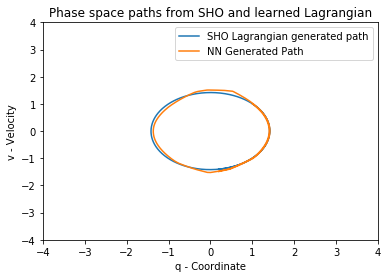

850
The Lagrangian Relative Error 0.04680552517533394


In [31]:
## This is the testing Window For Lagrangian


Best_Individual1 = Open_Parameters_Of_Network_For_Lagrangian()
Best_Individual = Best_Individual1
T_total = 8.5
    
## Testing network on longer data

First_Three_Space_Time_samples = np.array([[1,1.01,1.02],[0,0.01,0.02]])
q_true_L, v_true_L, dq_true, dp_true = Create_true_Lagrangian_path(First_Three_Space_Time_samples,T_total)
q_predicted_L, v_predicted_L, dq_predicted_L, dv_predicted_L =Create_predicted_Lagrangian_path2(Best_Individual,First_Three_Space_Time_samples,T_total)
    
N = q_true_L.shape[0]
plt.figure(4)
plt.plot(q_true_L,v_true_L)
plt.plot(q_predicted_L,v_predicted_L)
plt.title("Phase space paths from SHO and learned Lagrangian")
plt.xlabel("q - Coordinate")
plt.ylabel("v - Velocity")
plt.legend(["SHO Lagrangian generated path","NN Generated Path"])
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()


print(N)

Lagrangian_Relative_Error = np.sqrt((1/N)*np.sum((((v_true_L-v_predicted_L))**2 + ((q_true_L-q_predicted_L)**2 ))/(q_true_L**2 + v_true_L**2)))
print("The Lagrangian Relative Error",Lagrangian_Relative_Error)

From This Point down it is Hamiltonian Functions

In [48]:

def Save_to_CSV(Net1_Parameters,Net2_Parameters):
    
        ## Save the parameters of the network
#         Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"

        Name_Of_Parameter_File = "Hamiltonian_Networks_Parameters.csv"

        with open(Name_Of_Parameter_File, 'w') as csvfile:
            fieldnames = ['Net1_Parameters','Net2_Parameters']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()

            for i in range(0,Net1_Parameters.shape[0]):
                writer.writerow({ 'Net1_Parameters':Net1_Parameters[i],   'Net2_Parameters':Net2_Parameters[i]})




def Load_Parameters_For_Hamiltonian():
#     Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"
    Name_Of_Parameter_File = "Hamiltonian_Networks_Parameters.csv"
 
    ## Open Parameter array
    Parameters_Path = r"C:\Users\benjy\OneDrive\Brown\Fall 2018\PHYS 2030 - Classical Physics\Project\Files for the project" 
    Parameters_Path1 = Parameters_Path + "\\" + Name_Of_Parameter_File
    Parameters_temp = pandas.read_csv(Parameters_Path1)
    Parameters_Array = np.array(Parameters_temp)

    
    return Parameters_Array



def Open_Parameters_Of_Network_For_Hamiltonian():
    Best_Individual1 = Load_Parameters_For_Hamiltonian()
    A = Best_Individual1[:,0]
    B = Best_Individual1[:,1]
    print(A.shape)
    print(B.shape)

    Temp = np.concatenate([Best_Individual1[:,0],Best_Individual1[:,1]],axis = 0)
    print(np.array([Temp]).T.shape)

    Best_Individual1 = np.array([Temp]).T


    print(Best_Individual1.shape)
    Parameter_Vector1 = np.zeros(Best_Individual1.shape)

    for i in range(Best_Individual1.shape[0]):
        a = Best_Individual1[i,0]
        Parameter_Vector1[i] = float(a[1:6])


    Best_Individual1 = Parameter_Vector1

    return Best_Individual1



In [49]:
def Create_Predictions_for_paths2(Net1,Net2,Initial_conditions,dt,dq,dp,T_total):
    ## Change this to curent state and include time
    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Initial_conditions[0] - dq/2,Initial_conditions[1]])               
    Sample2 = np.array([t[i],Initial_conditions[0] + dq/2,Initial_conditions[1]])
    Sample3 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] - dp/2])               
    Sample4 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = Run_Through_5_layer_Net(Net1,Phase_Space_time_samples) + Run_Through_5_layer_Net(Net2,Phase_Space_time_samples)
    

    dp_predicted  = -(Hamiltonian_Samples[0,1] - Hamiltonian_Samples[0,0])/dq
    dq_predicted  = (Hamiltonian_Samples[0,3] - Hamiltonian_Samples[0,2])/dp
    
    return dq_predicted, dp_predicted    
    
    
    
def Create_predicted_path2(Parameter_Vector,First_two_phase_space_samples,T_total):

    # Individuals_Parameter_Vector = np.random.rand(70)
    Net1 =Reshape_into_5_layer_net(Parameter_Vector[0:TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)
    Net2 = Reshape_into_5_layer_net(Parameter_Vector[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)

    # Individuals_Parameter_Vector = np.random.rand(70)
    # Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[0:35])
    # Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[35:70])

    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]

    # dq = 0.1 ## this should be q[i] - q[i-1]
    # dp = 0.1 ## this should be p[i] - q[i-1]
    # dt = 0.1 ## this should be t[i] - t[i-1]

    # T_total = 10
    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])

    # dq_predicted, dp_predicted = Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    # NumberOfSamples = 10000
    NumberOfSamples = int(T_total/dt)
    dq_predicted = np.zeros(NumberOfSamples)
    dp_predicted = np.zeros(NumberOfSamples)
    q_predicted = np.zeros(NumberOfSamples)
    p_predicted = np.zeros(NumberOfSamples)

    ## Initializing
    q_predicted[0] = Initial_conditions[0]
    p_predicted[0] = Initial_conditions[1]
    dq_predicted[0], dp_predicted[0] = Create_Predictions_for_paths2(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):

        q_predicted[i] = q_predicted[i-1] + dq_predicted[i-1]
        p_predicted[i] = p_predicted[i-1] + dp_predicted[i-1]
        dq_predicted[i], dp_predicted[i] = Create_Predictions_for_paths2(Net1,Net2,np.array([q_predicted[i],p_predicted[i]]),dt,dq_predicted[i-1],dp_predicted[i-1],T_total)

    return q_predicted, p_predicted, dq_predicted, dp_predicted

In [50]:

class Hamiltonians(object):
    
    def __init__(self):
        m = 1

    def SHO_Hamiltonian(self,Phase_Space_time_samples):
        m = 1
        k = 1
        x = Phase_Space_time_samples[1,:]
        p = Phase_Space_time_samples[2,:]   

        Hamiltonian_Samples = (p**2)/(2*m) + (x**2)*k/2
        
        return         Hamiltonian_Samples 
    
    
def Calculate_Hamiltonian_for_1D_SHO_(Phase_Space_time_samples):
    Hamiltonian_for_1D_SHO_ = Hamiltonian_for_1D_SHO(Phase_Space_time_samples)
    return Hamiltonian_for_1D_SHO_



Phase_Space_time_samples = np.random.rand(4,3)
H = Hamiltonians()
print(H.SHO_Hamiltonian(Phase_Space_time_samples))

[0.43847566 0.18281566 0.36527564]


In [51]:
def Create_true_path(First_two_phase_space_samples,T_total):

    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]


    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])



    # NumberOfSamples = 10000
    NumberOfSamples = int(T_total/dt)
    dq_true = np.zeros(NumberOfSamples)
    dp_true = np.zeros(NumberOfSamples)
    q_true = np.zeros(NumberOfSamples)
    p_true = np.zeros(NumberOfSamples)

    ## Initializing
    q_true[0] = Initial_conditions[0]
    p_true[0] = Initial_conditions[1]
    
    H = H = Hamiltonians()
    dq_true[0], dp_true[0] = Create_True_Hamiltonian_paths(H,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):

        q_true[i] = q_true[i-1] + dq_true[i-1]
        p_true[i] = p_true[i-1] + dp_true[i-1]
        dq_true[i], dp_true[i] = Create_True_Hamiltonian_paths(H,np.array([q_true[i],p_true[i]]),dt,dq_true[i-1],dp_true[i-1],T_total)

    return q_true, p_true, dq_true, dp_true


def Create_True_Hamiltonian_paths(H,Curent_state,dt,dq,dp,T_total):

    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Curent_state[0] - dq/2,Curent_state[1]])               
    Sample2 = np.array([t[i],Curent_state[0] + dq/2,Curent_state[1]])
    Sample3 = np.array([t[i],Curent_state[0] ,Curent_state[1] - dp/2])               
    Sample4 = np.array([t[i],Curent_state[0] ,Curent_state[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = H.SHO_Hamiltonian(Phase_Space_time_samples)

    dp_true  = -(Hamiltonian_Samples[1] - Hamiltonian_Samples[0])*dt/dq
    dq_true  = (Hamiltonian_Samples[3] - Hamiltonian_Samples[2])*dt/dp
    
    return dq_true, dp_true    
    


In [52]:

def Prediction_for_State_Transitions(Net1,Net2,Initial_conditions,dt,dq,dp,T_total):
    ## Change this to curent state and include time
    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Initial_conditions[0] - dq/2,Initial_conditions[1]])               
    Sample2 = np.array([t[i],Initial_conditions[0] + dq/2,Initial_conditions[1]])
    Sample3 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] - dp/2])               
    Sample4 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = Run_Through_5_layer_Net(Net1,Phase_Space_time_samples) + Run_Through_5_layer_Net(Net2,Phase_Space_time_samples)
    

    dp_predicted  = -(Hamiltonian_Samples[0,1] - Hamiltonian_Samples[0,0])/dq
    dq_predicted  = (Hamiltonian_Samples[0,3] - Hamiltonian_Samples[0,2])/dp
    
    return dq_predicted, dp_predicted    
    

def Calculate_NN_State_Transitions(Parameter_Vector,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total):


    
    
#     Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector[0:35])
#     Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector[35:70])


    Net1 =Reshape_into_5_layer_net(Parameter_Vector[0:TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)
    Net2 = Reshape_into_5_layer_net(Parameter_Vector[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)


    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]

    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])


    NumberOfSamples = int(T_total/dt)
    dq_predicted = np.zeros(NumberOfSamples)
    dp_predicted = np.zeros(NumberOfSamples)
    q_predicted = np.zeros(NumberOfSamples)
    p_predicted = np.zeros(NumberOfSamples)

    ## Initializing
    q_predicted[0] = Initial_conditions[0]
    p_predicted[0] = Initial_conditions[1]
    dq_predicted[0], dp_predicted[0] = Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):
#     for i in range(1,10):

        q_predicted[i] = q_true[i] + dq_predicted[i-1]
        p_predicted[i] = p_true[i] + dp_predicted[i-1]
        dq_predicted[i], dp_predicted[i] = Prediction_for_State_Transitions(Net1,Net2,np.array([q_true[i],p_true[i]]),dt,dq_predicted[i-1],dp_predicted[i-1],T_total)
        
    return q_predicted, p_predicted, dq_predicted, dp_predicted


def Create_predicted_path(Parameter_Vector,First_two_phase_space_samples,T_total):

    # Individuals_Parameter_Vector = np.random.rand(70)
    Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector[0:35])
    Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector[35:70])

    # Individuals_Parameter_Vector = np.random.rand(70)
    # Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[0:35])
    # Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[35:70])

    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]

    # dq = 0.1 ## this should be q[i] - q[i-1]
    # dp = 0.1 ## this should be p[i] - q[i-1]
    # dt = 0.1 ## this should be t[i] - t[i-1]

    # T_total = 10
    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])

    # dq_predicted, dp_predicted = Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    # NumberOfSamples = 10000
    NumberOfSamples = int(T_total/dt)
    dq_predicted = np.zeros(NumberOfSamples)
    dp_predicted = np.zeros(NumberOfSamples)
    q_predicted = np.zeros(NumberOfSamples)
    p_predicted = np.zeros(NumberOfSamples)

    ## Initializing
    q_predicted[0] = Initial_conditions[0]
    p_predicted[0] = Initial_conditions[1]
    dq_predicted[0], dp_predicted[0] = Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):

        q_predicted[i] = q_predicted[i-1] + dq_predicted[i-1]
        p_predicted[i] = p_predicted[i-1] + dp_predicted[i-1]
        dq_predicted[i], dp_predicted[i] = Create_Predictions_for_paths(Net1,Net2,np.array([q_predicted[i],p_predicted[i]]),dt,dq_predicted[i-1],dp_predicted[i-1],T_total)

    return q_predicted, p_predicted, dq_predicted, dp_predicted


def Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total):
    ## Change this to curent state and include time
    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Initial_conditions[0] - dq/2,Initial_conditions[1]])               
    Sample2 = np.array([t[i],Initial_conditions[0] + dq/2,Initial_conditions[1]])
    Sample3 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] - dp/2])               
    Sample4 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = Run_Through_Nural_Network_for_1D_SHO(Net1,Phase_Space_time_samples) + Run_Through_Nural_Network_for_1D_SHO(Net2,Phase_Space_time_samples)
    
#     print( Phase_Space_time_samples)
#     print( Hamiltonian_Samples)
#     print(np.shape(Hamiltonian_Samples))
#     print(Hamiltonian_Samples[0,1],Hamiltonian_Samples[0,0])
#     print(Hamiltonian_Samples[0,3],Hamiltonian_Samples[0,2])
    
    dp_predicted  = -(Hamiltonian_Samples[0,1] - Hamiltonian_Samples[0,0])/dq
    dq_predicted  = (Hamiltonian_Samples[0,3] - Hamiltonian_Samples[0,2])/dp
    
    return dq_predicted, dp_predicted    
    


(86,)
(86,)
(172, 1)
(172, 1)
(172, 1)


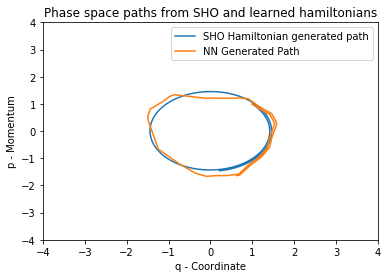

850
The Hamiltonian Relative Error 0.17741624411232923


In [53]:
Best_Individual1 = Open_Parameters_Of_Network_For_Hamiltonian()
Best_Individual = Best_Individual1
print(Best_Individual1.shape)
T_total = 8.5
    
## Testing network on longer data

# First_two_phase_space_samples = np.array([[1,1.01],[2,2.01],[0,0.01]])
First_two_phase_space_samples = np.array([[1,1.01],[1,0.98984507],[0,0.01]])
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path2(Best_Individual,First_two_phase_space_samples,T_total)
# q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)

N = q_true.shape[0]

plt.figure(4)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()


print(N)

Hamiltonian_Relative_Error = np.sqrt((1/N)*np.sum((((p_true-p_predicted))**2 + ((q_true-q_predicted)**2 ))/(q_true**2 + p_true**2)))
print("The Hamiltonian Relative Error",Hamiltonian_Relative_Error)

From her and down it is the legandre transformation test

(86,)
(86,)
(172, 1)
(172, 1)
(86,)
(86,)
(172, 1)
(172, 1)


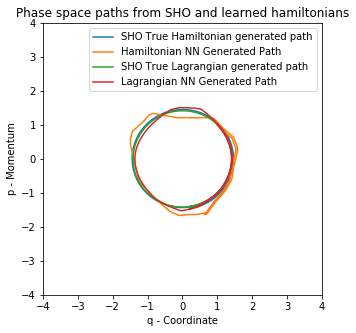

1.0
Mean_Relative_Legandre_Transformation_Error 32.641991255156874
(850,)


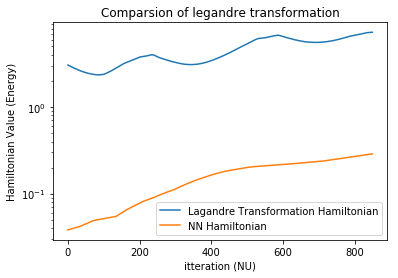

In [63]:
Best_Individual1 = Open_Parameters_Of_Network_For_Hamiltonian()
Best_Individual = Best_Individual1

# First_two_phase_space_samples = np.array([[1,1.01],[2,2.01],[0,0.01]])
First_two_phase_space_samples = np.array([[1,1.01],[1,0.98984507],[0,0.01]])
dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]


t = np.linspace(0,T_total,np.int(T_total/dt))

Phase_Space_time_samples= np.array([t,q_predicted,p_predicted])

Parameter_Vector = Best_Individual
Net1 =Reshape_into_5_layer_net(Parameter_Vector[0:TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)
Net2 = Reshape_into_5_layer_net(Parameter_Vector[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)



Hamiltonian_Samples = Run_Through_5_layer_Net(Net1,Phase_Space_time_samples) + Run_Through_5_layer_Net(Net2,Phase_Space_time_samples)








Best_Individual1 = Open_Parameters_Of_Network_For_Lagrangian()
Best_Individual = Best_Individual1

First_Three_Space_Time_samples = np.array([[1,1.01,1.02],[0,0.01,0.02]])
# dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]


# t = np.linspace(0,T_total,np.int(T_total/dt))

Phase_Space_time_samples= np.array([t,q_predicted_L,v_predicted_L])

Parameter_Vector = Best_Individual
Net1 =Reshape_into_5_layer_net(Parameter_Vector[0:TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)
Net2 = Reshape_into_5_layer_net(Parameter_Vector[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)



Lagrangian_Samples = Run_Through_5_layer_Net(Net1,Phase_Space_time_samples) + Run_Through_5_layer_Net(Net2,Phase_Space_time_samples)
    




m = 1



Coversion_Factor1 = np.mean(np.minimum(abs((q_true/(q_true_L))),2.4))
# print(abs((q_true/(q_true_L))))
# Coversion_Factor2 = np.mean(abs(q_true/(m*v_true_L+0.01)))

Coversion_Factor2 = np.mean(np.minimum(abs((q_true/(m*v_true_L))),2.3))
Coversion_Factor2 = 1
Coversion_Factor1 = 1
Coversion_Factor = (Coversion_Factor2 + Coversion_Factor1)/2


plt.figure(4,figsize=(5,5))
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.plot(Coversion_Factor1*q_true_L,Coversion_Factor2*m*v_true_L)
plt.plot(Coversion_Factor1*q_predicted_L,Coversion_Factor2*m*v_predicted_L)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO True Hamiltonian generated path","Hamiltonian NN Generated Path","SHO True Lagrangian generated path","Lagrangian NN Generated Path",""])
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()




print(Coversion_Factor)
# Calculated_Hamiltonian_From_Lagandre = p_predicted*v_predicted_L - Lagrangian_Samples
Calculated_Hamiltonian_From_Lagandre = m*(v_predicted_L**2) - Lagrangian_Samples
Predicted_Hamiltonian = Hamiltonian_Samples

Mean_Relative_Legandre_Transformation_Error = np.mean(np.abs((Calculated_Hamiltonian_From_Lagandre - Predicted_Hamiltonian)/(Predicted_Hamiltonian)))

print("Mean_Relative_Legandre_Transformation_Error",Mean_Relative_Legandre_Transformation_Error)

print(Calculated_Hamiltonian_From_Lagandre[0,:].shape)
plt.figure(6)
plt.semilogy(Calculated_Hamiltonian_From_Lagandre[0,:])
plt.semilogy(Predicted_Hamiltonian[0,:])
plt.legend(["Lagandre Transformation Hamiltonian","NN Hamiltonian"])
plt.title("Comparsion of legandre transformation")
plt.xlabel("itteration (NU)")
plt.ylabel("Hamiltonian Value (Energy)")